In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

In [125]:
df = pd.read_csv("app/data/Cars.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 2. EDA

### Inspect "owner"

In [127]:
# Check all unique values in column "owner"
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [128]:
# Map First owner to 1, ..., Test Drive Car to 5 in owner column
df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5}, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [129]:
# Check selling_price via each category of owner
print('-'*40)
print('Means of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by owner
----------------------------------------
owner
1     783086.0
2     392964.0
3     284015.0
4     225813.0
5    4403800.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by owner
----------------------------------------
owner
1     550000.0
2     310000.0
3     225000.0
4     170000.0
5    5923000.0
Name: selling_price, dtype: float64


In [130]:
# Drop "Test Drive Cars" because they are too expensive
df =  df[df['owner'] != 5].reset_index(drop=True)
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 0, 'owner')

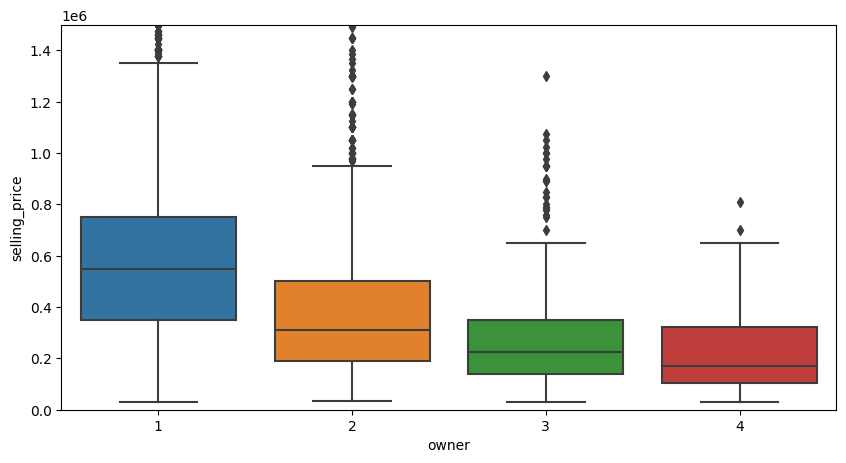

In [131]:
plt.figure(figsize=(10, 5))

sns.boxplot(x = df["owner"], y = df["selling_price"])

plt.ylim([0, 1500000])
plt.ylabel("selling_price")
plt.xlabel("owner")

### Inspect "fuel"

In [132]:
# Check all unique values in column "fuel"
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [133]:
# Remove all rows with CNG and LPG because CNG and LPG in "fuel" column
to_remove = ['LPG', 'CNG']
df =  df[~df['fuel'].isin(to_remove)].reset_index(drop=True)
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Text(0.5, 0, 'fuel')

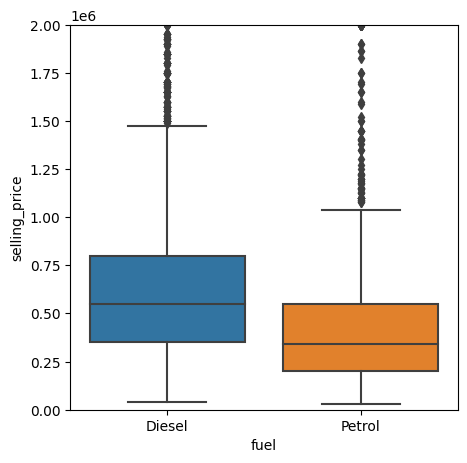

In [134]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = df["fuel"], y = df["selling_price"])

plt.ylim([0, 2000000])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'fuel')

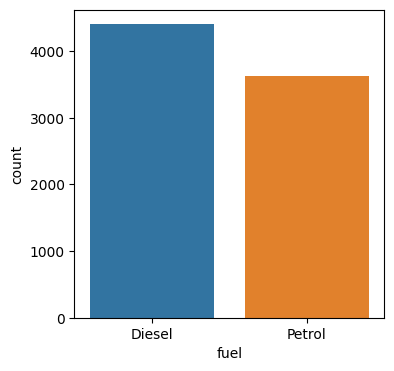

In [135]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='fuel')

plt.xlabel("fuel")

### Inspect "mileage"

In [136]:
# For mileage, remove "kmpl" and convert the column to float type
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

### Inspect "Engine"

In [137]:
# For engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

### Inspect "max_power"

In [138]:
# For max_power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8023     82.85
8024    110.00
8025     73.90
8026     70.00
8027     70.00
Name: max_power, Length: 8028, dtype: float64

### Inspect "name"

In [139]:
# For the feature brand, take only the first word and remove the rest
df['name'] = df['name'].str.split().str[0]
df.rename(columns={'name': 'brand'}, inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [140]:
# Check the mean selling price by car brand
print('-'*40)
print('Means of selling_price by owner')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].mean().round())

----------------------------------------
Means of selling_price by owner
----------------------------------------
brand
Ambassador        124000.0
Ashok             300000.0
Audi             2319432.0
BMW              4109917.0
Chevrolet         274515.0
Daewoo             77000.0
Datsun            314600.0
Fiat              296064.0
Force             887500.0
Ford              516683.0
Honda             593166.0
Hyundai           462422.0
Isuzu            1942000.0
Jaguar           2915465.0
Jeep             2149613.0
Kia              1504500.0
Land             3608333.0
Lexus            5150000.0
MG               1783333.0
Mahindra          623224.0
Maruti            406733.0
Mercedes-Benz    2470444.0
Mitsubishi        817500.0
Nissan            465407.0
Opel               68000.0
Peugeot            57000.0
Renault           462618.0
Skoda             607724.0
Tata              357709.0
Toyota            959947.0
Volkswagen        494216.0
Volvo            3272015.0
Name: selling_pr

In [141]:
# Check the median selling price by car brand
print('-'*40)
print('Median of selling_price by owner')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].median().round())

----------------------------------------
Median of selling_price by owner
----------------------------------------
brand
Ambassador        110500.0
Ashok             300000.0
Audi             2200000.0
BMW              5400000.0
Chevrolet         223000.0
Daewoo             86000.0
Datsun            300000.0
Fiat              280000.0
Force             910000.0
Ford              480000.0
Honda             567500.0
Hyundai           445000.0
Isuzu            1900000.0
Jaguar           3000000.0
Jeep             1675000.0
Kia              1737500.0
Land             4500000.0
Lexus            5150000.0
MG               1750000.0
Mahindra          560000.0
Maruti            370000.0
Mercedes-Benz    2075500.0
Mitsubishi        787500.0
Nissan            375000.0
Opel               68000.0
Peugeot            57000.0
Renault           397000.0
Skoda             645000.0
Tata              280000.0
Toyota            750000.0
Volkswagen        425000.0
Volvo            3400000.0
Name: selling_p

Text(0.5, 0, 'brand')

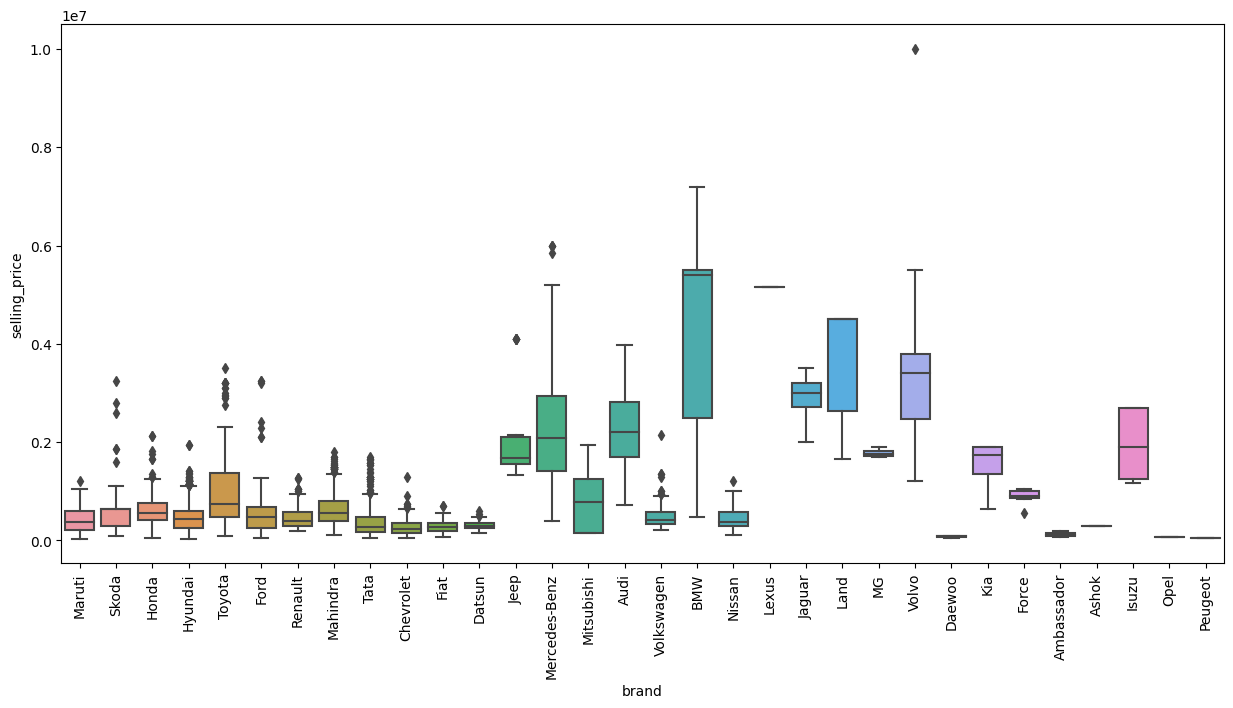

In [142]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df["brand"], y = df["selling_price"]);

plt.xticks(rotation='vertical')
plt.ylabel("selling_price")
plt.xlabel("brand")

We can see from the boxplot that each car brand has vastly different sets of price, therefore car brand should be selected as predictor

Text(0.5, 0, 'brand')

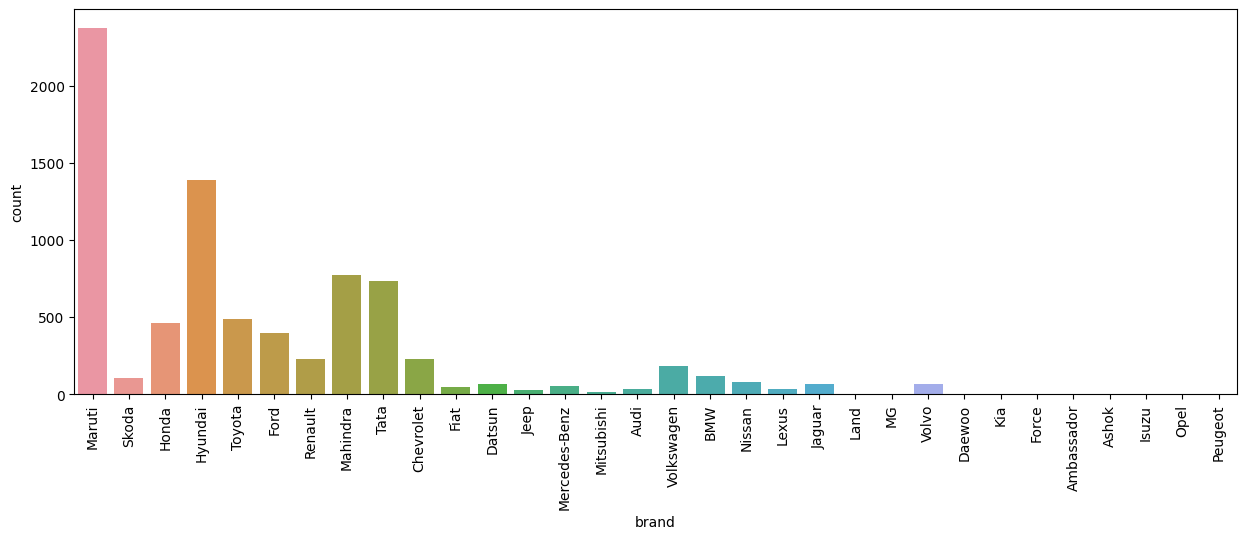

In [143]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='brand')

plt.xticks(rotation='vertical')
plt.xlabel("brand")

In [144]:
f = {'max_power': 1,
                'year': 2,
                'engine': 3,
                'fuel': 4,
                'brand': 5}

pd.DataFrame(f, index=[0])

,max_power,year,engine,fuel,brand
0,1,2,3,4,5


In [145]:
['a']+list(f.values())

['a', 1, 2, 3, 4, 5]

### Inpect "torque"

In [146]:
# Chaky’s company does not understand well about the feature 'torque'
# Therefore we will drop it
df.drop(columns='torque', inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Label and One-Hot Encoding

In [147]:
# Check all unique values of 'brand'
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [148]:
# Check all unique values of 'transmission'
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [149]:
# Check all unique values of 'seller_type'
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [150]:
# Check all unique values of 'brand'
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [151]:
# Since 'fuel' and 'transmission' have only two unique values, we can do label encoding
from sklearn.preprocessing import LabelEncoder

# Label encoding on 'fuel'
fuel_le = LabelEncoder()
df['fuel'] = fuel_le.fit_transform(df['fuel'])

# Label encoding on 'transmission'
trans_le = LabelEncoder()
df['transmission'] = trans_le.fit_transform(df['transmission'])

In [152]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [153]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

seller_type_ohe = OneHotEncoder(drop='first').fit(df[['seller_type']])
df = one_hot_transform(seller_type_ohe, df, 'seller_type')

In [154]:
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
                 'Individual', 'Trustmark Dealer']
dfcopy = df.copy()
dfcopy = df[selected_cols]

<Axes: >

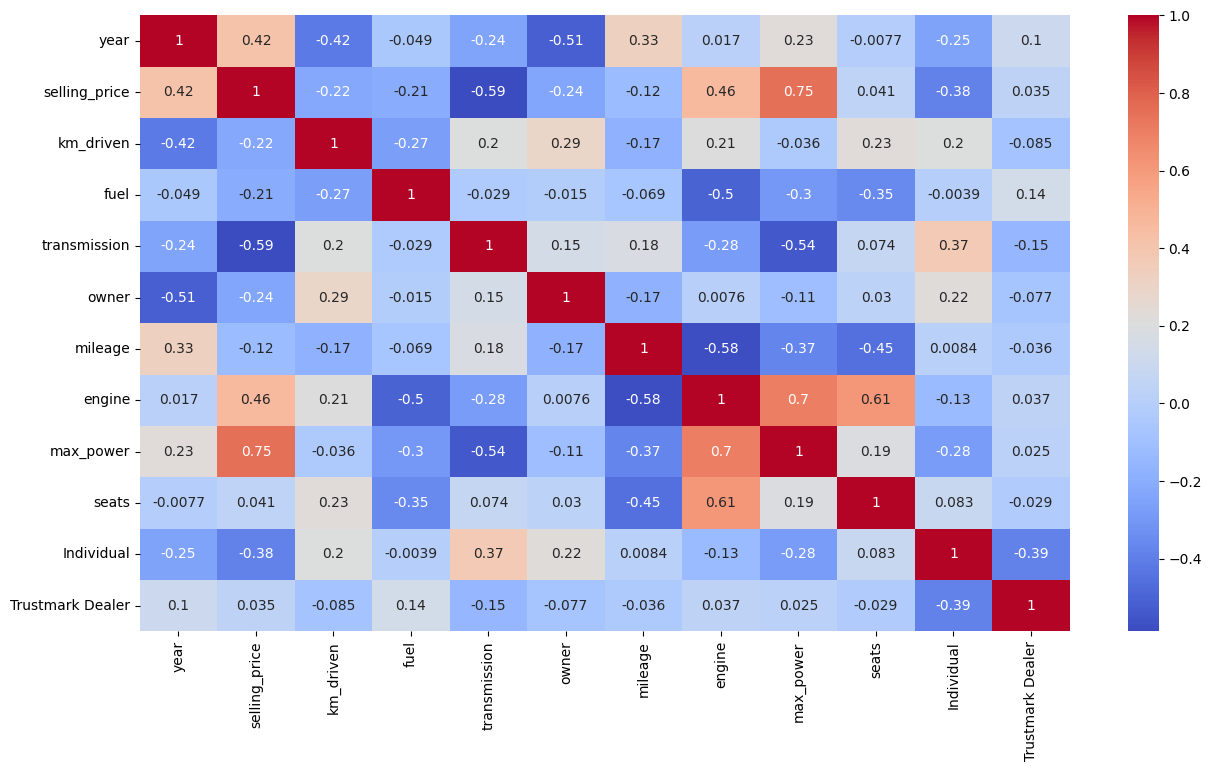

In [155]:
# Correlation matrix
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

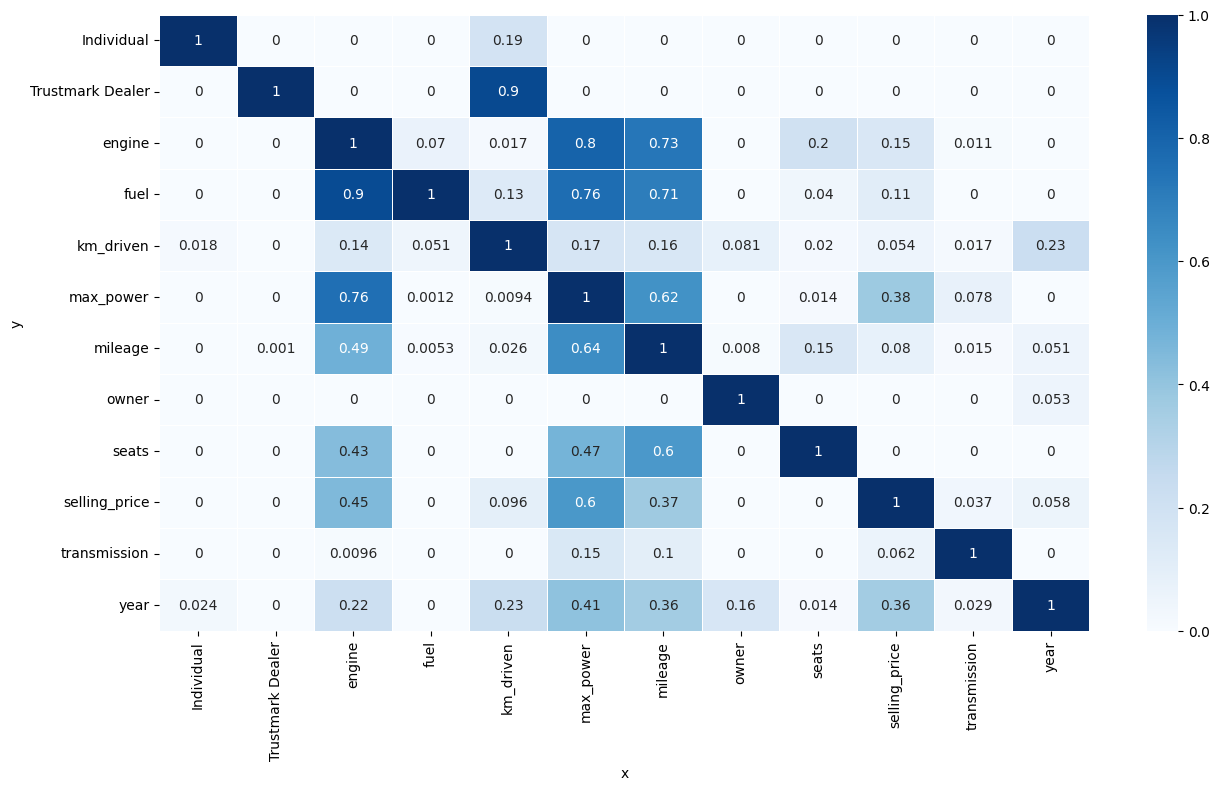

In [156]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Data Preprocessing

- From the ppscore matrix, we will select only features with predictive power score > 0.1 in order to predict "selling_price"
- However, we will not select "engine" because it has high correlation with "max_power" and has much lower predictive power.
- In addition, we'll also select columns corresponding to "brand" as features due to the reason mentioned in EDA part

In [157]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel'] + brand_cats
X = df[selected_cols]
y = np.log(df['selling_price'])

### Train test split

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Find number of null values for each feature

In [159]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
dtype: int64

In [160]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
dtype: int64

In [161]:
y_train.isna().sum()

0

In [162]:
y_test.isna().sum()

0

### max_power

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


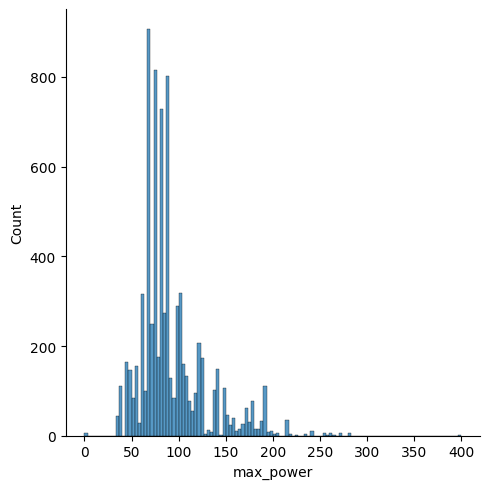

In [163]:
# Max_power is also skewed so median would be a better choice
sns.displot(data=df, x='max_power')
print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

In [164]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

### year

Mean of year: 2013.8155206776282
Median of year: 2015.0


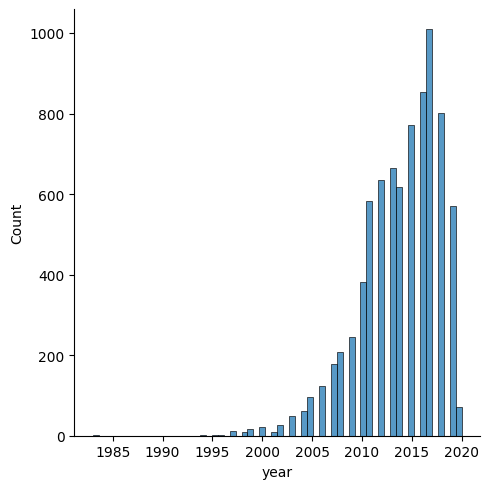

In [165]:
sns.displot(data=df, x='year')
print(f"Mean of year: {df['year'].mean()}")
print(f"Median of year: {df['year'].median()}")

### Scaling

As seen in the distribution plots above, all of our numerical features are skewed. Therefore, it is better to do normalization

In [166]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# select only features with numerical values not categorical
num_cols = ['max_power', 'year']
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [167]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 34)
Shape of X_test:  (1606, 34)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [168]:
y_test

5867    12.323856
5957    13.710150
3032    12.676076
6445    13.384728
318     13.161584
          ...    
4608    12.994530
2943    13.458836
2441    11.002100
921     13.527828
322     12.899220
Name: selling_price, Length: 1606, dtype: float64

## 4. Modeling

In [169]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 42), 
              RandomForestRegressor(n_estimators = 100, random_state = 42)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [170]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("Negative MSE:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Negative MSE:


Linear Regression - Score: [-0.07227982 -0.07394935 -0.07133368 -0.06742736 -0.07035701 -0.07447382
 -0.06781317 -0.06912245 -0.07368488 -0.07665375]; Mean: -0.0717095287886022
SVR - Score: [-0.06067172 -0.06404988 -0.05853694 -0.05490655 -0.06094061 -0.06549843
 -0.05608432 -0.05687824 -0.06204415 -0.06141215]; Mean: -0.06010229918152522
KNeighbors Regressor - Score: [-0.06169671 -0.0617132  -0.0650807  -0.05103199 -0.05361614 -0.06029619
 -0.05543798 -0.05796177 -0.04887741 -0.05919692]; Mean: -0.05749090073483013
Decision-Tree Regressor - Score: [-0.06102502 -0.07089975 -0.06000507 -0.04856875 -0.05704608 -0.05660403
 -0.06207161 -0.05304102 -0.0534417  -0.05757806]; Mean: -0.058028109708591326
Random-Forest Regressor - Score: [-0.05165252 -0.05953726 -0.05342725 -0.04373517 -0.0496137  -0.05190015
 -0.0515034  -0.04919406 -0.04556958 -0.04711233]; Mean: -0.05032454180889827


In [171]:
print("R2:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

R2:
Linear Regression - Score: [0.89148829 0.89949014 0.90039406 0.90212936 0.9021499  0.89068654
 0.91032899 0.88552259 0.90734757 0.87702564]; Mean: 0.8966563078455853
SVR - Score: [0.90891521 0.91294523 0.91826263 0.92030328 0.91524591 0.9038607
 0.92583833 0.90580089 0.92198479 0.90147748]; Mean: 0.9134634462722955
KNeighbors Regressor - Score: [0.90737643 0.91612118 0.90912534 0.92592719 0.92543252 0.91149661
 0.92669302 0.9040064  0.93854083 0.90503134]; Mean: 0.9169750850568518
Decision-Tree Regressor - Score: [0.90838481 0.90363507 0.91621264 0.92950258 0.92066228 0.91691601
 0.9179212  0.91215591 0.93280163 0.90762846]; Mean: 0.9165820575696417
Random-Forest Regressor - Score: [0.92245549 0.91907865 0.92539749 0.9365185  0.93099897 0.92382041
 0.9318958  0.91852708 0.94270015 0.92441846]; Mean: 0.9275811009045946


We will select Random-Forest Regressor because it has the highest negative MSE and R2 scores compared to other models.

In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [173]:
# The best parameters of Random-Forest Regressor from grid searching
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 13}

In [174]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse

-0.05061680782562176

## 5. Testing

In [175]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

MSE:  0.04713219748772772
r2:  0.9338162360961892


In [176]:
# Compared actual and predicted selling prices
pd.DataFrame({'actual_price': np.exp(y_test), 'predicted_price': np.exp(y_pred)})

,actual_price,predicted_price
5867,225000.0,229381.095695
5957,900000.0,950670.725702
3032,320000.0,348687.266225
6445,650000.0,495987.964331
318,520000.0,593987.049550
...,...,...
4608,440000.0,460969.463849
2943,700000.0,910213.681425
2441,60000.0,44259.747311
921,750000.0,600891.067147


## 6. Inference

In [177]:
import pickle

In [178]:
# save the model to disk
model_path = 'app/model/car_price_prediction.model'
pickle.dump(grid, open(model_path, 'wb'))

# save the scaler to disk
scaler_path = 'app/preprocess/scaler.prep'
pickle.dump(scaler, open(scaler_path, 'wb'))

# save the label encoder for 'fuel' to disk
fuel_enc_path = 'app/preprocess/fuel_encoder.prep'
pickle.dump(fuel_le, open(fuel_enc_path, 'wb'))

# save the one hot encoder for 'brand' to disk
brand_enc_path = 'app/preprocess/brand_encoder.prep'
pickle.dump(brand_ohe, open(brand_enc_path, 'wb'))

In [179]:
# paths of all components for car price predictions
model_path = 'app/model/car_price_prediction.model'
scaler_path = 'app/preprocess/scaler.prep'
fuel_enc_path = 'app/preprocess/fuel_encoder.prep'
brand_enc_path = 'app/preprocess/brand_encoder.prep'

# load all components
model = pickle.load(open(model_path, 'rb'))
scaler = pickle.load(open(scaler_path, 'rb'))
fuel_le = pickle.load(open(fuel_enc_path, 'rb'))
brand_ohe = pickle.load(open(brand_enc_path, 'rb'))

In [180]:
fuel_le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [181]:
sample_df = pd.DataFrame([[78, 2006, 'Petrol', 'Honda']],
                         columns=['max_power', 'year', 'fuel', 'brand'])
sample_df

,max_power,year,fuel,brand
0,78,2006,Petrol,Honda


In [182]:
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
sample_df['fuel'] = fuel_le.transform(sample_df[['fuel']])
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.276596,0.621622,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
np.exp(model.predict(sample_df))

array([160308.19680523])